## Decision Tree

In [21]:
# Importa as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#pip install pydotpus
#pip install graphviz

# Seta um valor para o random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

Para a realização do projeto, foi necessário instalar bibliotecas como o pydotplus e o graphviz, com a função "pip install graphviz" no anaconda prompt, com o intuito de fazer o gráfico localizado no final deste documento. Além disso, bibliotecas como o skylearn foram utilizadas por possuirem funções relativas a Decision Tree.

In [22]:
# Seta as colunas da nossa tabela
colunas=["Country","Region","Hemisphere","HappinessScore","HDI","GPD_PerCapita","Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]

# Importa a base de dados "HappinessAlcoholConsumprion.xls"
dados = pd.read_excel("HappinessAlcoholConsumption.xls", header=None, names=colunas)
dados = dados.iloc[1:,] #retira a primeira coluna
dados.head(3) #printa os dados

Country          Region Hemisphere HappinessScore  HDI GPD_PerCapita  \
1      Denmark  Western Europe      north          7.526  928        53.579   
2  Switzerland  Western Europe      north          7.509  943        79.866   
3      Iceland  Western Europe      north          7.501  933         60.53   

  Beer_PerCapita Spirit_PerCapita Wine_PerCapita  
1            224               81            278  
2            185              100            280  
3            233               61             78

In [23]:
# Seleciona quais serão as colunas de estudo
feature_cols = ["HDI","GPD_PerCapita","Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]
X = dados[feature_cols]
y = dados.HappinessScore

In [24]:
# Separa os dados em 90% treino e 10% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED) 

In [25]:
# Faz a Decision Tree
dt = DecisionTreeRegressor(random_state = 42)

dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [26]:
#y_pred

In [27]:
# Calculando a diferença entre o valor do teste e do treinamento
erro=[]
for i,e in zip(y_pred,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [28]:
data = {
'Y_pred': y_pred,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_pred', 'Y_test','Erro','Classificação' ]) # Cria uma tabela
tabela

Y_pred Y_test   Erro Classificação
19    6.725  6.871  0.146         Certo
46    5.743  5.956  0.213         Certo
48    5.155  5.919  0.764        Errado
90    3.739  4.635  0.896        Errado
5     6.725  7.413  0.688        Errado
41    5.045  6.068  1.023        Errado
63    5.648  5.528  0.120         Certo
108   3.956  4.028  0.072         Certo
32    5.510  6.474  0.964        Errado
56    5.033  5.768  0.735        Errado
54    5.560  5.813  0.253         Certo
120   3.303  3.484  0.181         Certo
11    5.835  7.267  1.432        Errado

In [29]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A Decision Tree acertou {0}%".format(acertou))

A Decision Tree acertou 46.15384615384615%


In [30]:
# Código para plotar o Decision Tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

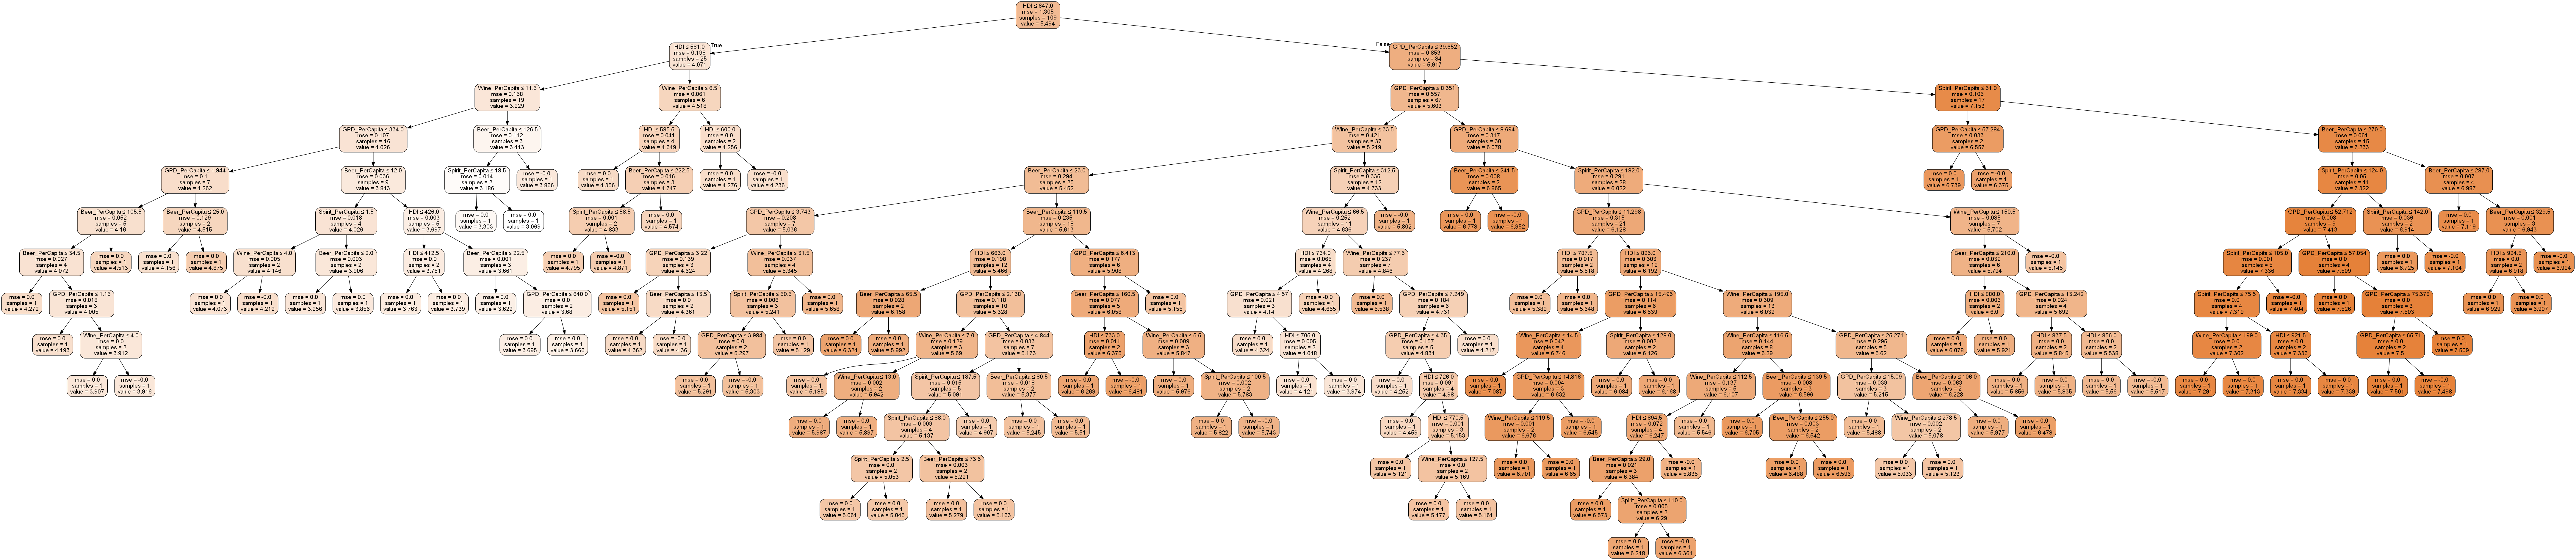

In [31]:
# Plota o Decision Tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grafico.png')
Image(graph.create_png())

In [18]:
#! explorer .

## Aumentando a acurácia (Optimizando a performance)

Com intuito de melhorar a acurácia (a porcentagem de acertos) da decision tree, foram setados os seguinter parâmetros no código responsável por calcular a decision tree: "criterion"='mse', splitter='random', max_depth=None, e o random state permaneceu igual com o valor de 42.

In [19]:
# Faz a Decision Tree
dt = DecisionTreeRegressor(criterion='mse',splitter='random', max_depth=None, random_state=RANDOM_SEED)

dt = dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [20]:
# Calculando a diferença entre o valor do teste e do treinamento
erro=[]
for i,e in zip(y_pred,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)
    
data = {
'Y_pred': y_pred,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_pred', 'Y_test','Erro','Classificação' ])

contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A Decision Tree acertou {0}%".format(acertou))

A Decision Tree acertou 53.84615384615385%


In [18]:
# Código para plotar o Decision Tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

In [41]:
# Plota o Decision Tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('grafico2.png')
Image(graph.create_png())

In [ ]:
#! explorer .